In [1]:
import tensorflow

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Cotton_disease/train_/train'
valid_path = '/content/drive/My Drive/Cotton_disease/test_/test'

In [4]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
for layer in resnet.layers:
    layer.trainable = False

In [6]:
folders = glob('/content/drive/My Drive/Cotton_disease/train_/train/*')

In [7]:
folders

['/content/drive/My Drive/Cotton_disease/train_/train/diseased cotton leaf',
 '/content/drive/My Drive/Cotton_disease/train_/train/diseased cotton plant',
 '/content/drive/My Drive/Cotton_disease/train_/train/fresh cotton leaf',
 '/content/drive/My Drive/Cotton_disease/train_/train/fresh cotton plant']

In [8]:
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

In [10]:
model = Model(inputs=resnet.input, outputs=prediction)

In [11]:
model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Cotton_disease/train_/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Cotton_disease/test_/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [16]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
61/61 [==============================] - 1058s 17s/step - loss: 3.7124 - accuracy: 0.3788 - val_loss: 1.1368 - val_accuracy: 0.4444
Epoch 2/50
61/61 [==============================] - 40s 662ms/step - loss: 1.0565 - accuracy: 0.5536 - val_loss: 1.1605 - val_accuracy: 0.6111
Epoch 3/50
61/61 [==============================] - 40s 662ms/step - loss: 1.0018 - accuracy: 0.6043 - val_loss: 0.8251 - val_accuracy: 0.6667
Epoch 4/50
61/61 [==============================] - 41s 670ms/step - loss: 0.8901 - accuracy: 0.6520 - val_loss: 0.9435 - val_accuracy: 0.6111
Epoch 5/50
61/61 [==============================] - 40s 661ms/step - loss: 0.9596 - accuracy: 0.6161 - val_loss: 1.7018 - val_accuracy: 0.6667
Epoch 6/50
61/61 [==============================] - 40s 661ms/step - loss: 0.8887 - accuracy: 0.6638 - val_loss: 0.6102 - val_accuracy: 0.7778
Epoch 7/50
61/61 [==============================] - 40s 657ms/step

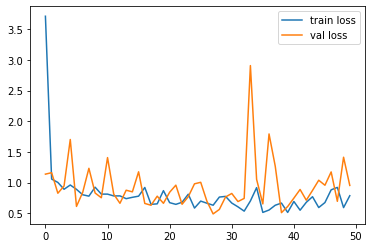

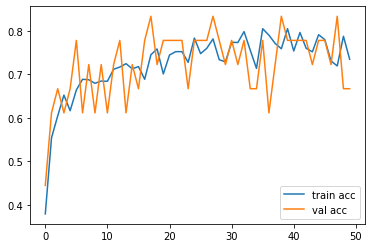

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
from tensorflow.keras.models import load_model

model.save('resnet50_model.h5')